1- Juntar todas as imagens em uma única

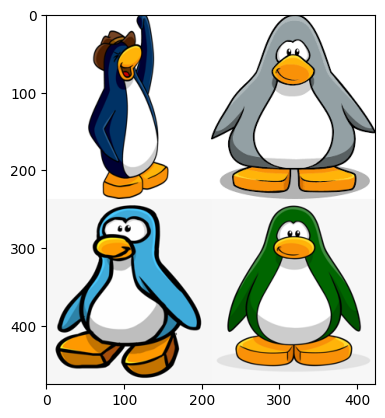

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Função para que a imagem tenha 3 canais
def convert_to_rgb(image):
    if image.mode != 'RGB':
        return image.convert('RGB')
    return image

# Carregando imagens
img1 = Image.open('P1.png')
img2 = Image.open('P2.png')
img3 = Image.open('P3.jpg')
img4 = Image.open('P4.png')

# Convertendo imagens para RGB
img1 = convert_to_rgb(img1)
img2 = convert_to_rgb(img2)
img3 = convert_to_rgb(img3)
img4 = convert_to_rgb(img4)

# Convertendo para arrays
img1_arr = np.array(img1)
img2_arr = np.array(img2)
img3_arr = np.array(img3)
img4_arr = np.array(img4)

# Validando e redimensionando as imagens para que tenham o mesmo tamanho
new_size = (min(img1_arr.shape[1], img2_arr.shape[1], img3_arr.shape[1], img4_arr.shape[1]),
            min(img1_arr.shape[0], img2_arr.shape[0], img3_arr.shape[0], img4_arr.shape[0]))

img1_resized = np.array(img1.resize(new_size))
img2_resized = np.array(img2.resize(new_size))
img3_resized = np.array(img3.resize(new_size))
img4_resized = np.array(img4.resize(new_size))

# Combinando as imagens em duas linhas
top_row = np.hstack((img1_resized, img2_resized))  
bottom_row = np.hstack((img3_resized, img4_resized))  

# Juntando as duas linhas
combined_image = np.vstack((top_row, bottom_row))

# Convertendo de array para imagem
final_image = Image.fromarray(combined_image)

# Exibindo e salvando a imagem combinada
plt.imshow(final_image)

final_image.save('pinguins_juntos.png')


2- Trocar as cores (mudar a cor dos pinguins para qualquer outra)

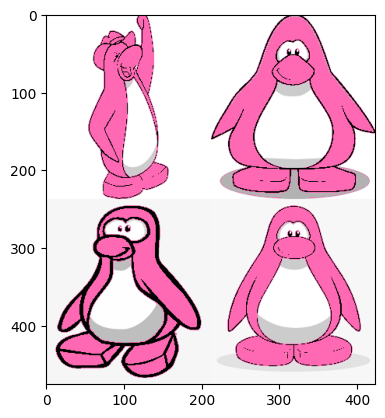

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Carregando a imagem
img = Image.open('pinguins_juntos.png')

# Convertendo a imagem para array
image = np.array(img)[:, :, :3]

# Fazendo uma máscara para ignorar o fundo branco e ignorar as linhas pretas
# Foram feitos testes para definir o valor mais próximo do ideal
mask = np.all(image > [177, 177, 177], axis=-1)
black_mask = np.all(image < [30, 30, 30], axis=-1)

# Aplicando uma nova cor nos pinguins
new_color = [255, 105, 180]  # Rosa
image_recolored = image.copy()
image_recolored[~mask & ~black_mask] = new_color

# Convertendo de array para imagem
image_recolored = Image.fromarray(image_recolored)

# Exibindo e salvando a imagem colorida
plt.imshow(image_recolored)

image_recolored.save('imagem_recolorida.png')

3- Aplicar o espelhamento

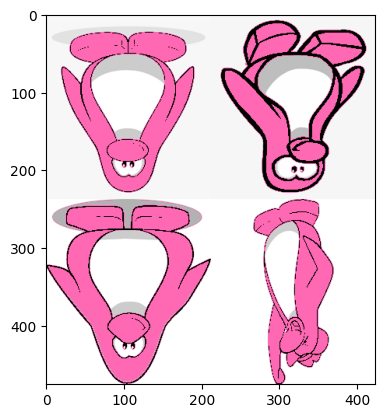

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Carregando a imagem
img = Image.open('imagem_recolorida.png')

# Convertendo a imagem para array
image = np.array(img)[:, :, :3]

# Espelhando em X e Y
img_refl = np.zeros(shape=image.shape, dtype=np.uint8)
img_refl[::-1, ::-1] = image

# Convertendo de array para imagem
img_refl = Image.fromarray(img_refl)

# Exibindo e salvando a imagem espelhada
plt.imshow(img_refl)

img_refl.save('imagem_espelhada.png')

4- Recortar seu pinguim favorito (descarte os outros, deixando apenas um na imagem).

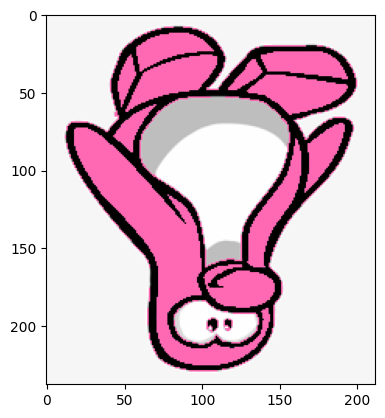

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Carregando a imagem
img = Image.open('imagem_espelhada.png')

# Convertendo a imagem para array
image = np.array(img)

# Definindo as dimensões da imagem
height, width, _ = image.shape

# Dividindo a imagem em 4 quadrantes
half_height = height // 2
half_width = width // 2

# Definindo as coordenadas do primeiro quadrante (pinguim escolhido)
first_quadrant = image[0:half_height, half_width:width]

# Convertendo o quadrante em uma imagem
first_quadrant_img = Image.fromarray(first_quadrant)

# Exibindo e salvando a imagem do pinguim escolhido
plt.imshow(first_quadrant_img)

first_quadrant_img.save('pinguim_escolhido.png')

5- Faça a analise do histograma em seu pinguim favorito e escolha um valor de threshold. (Justifique a escolha do threshold)

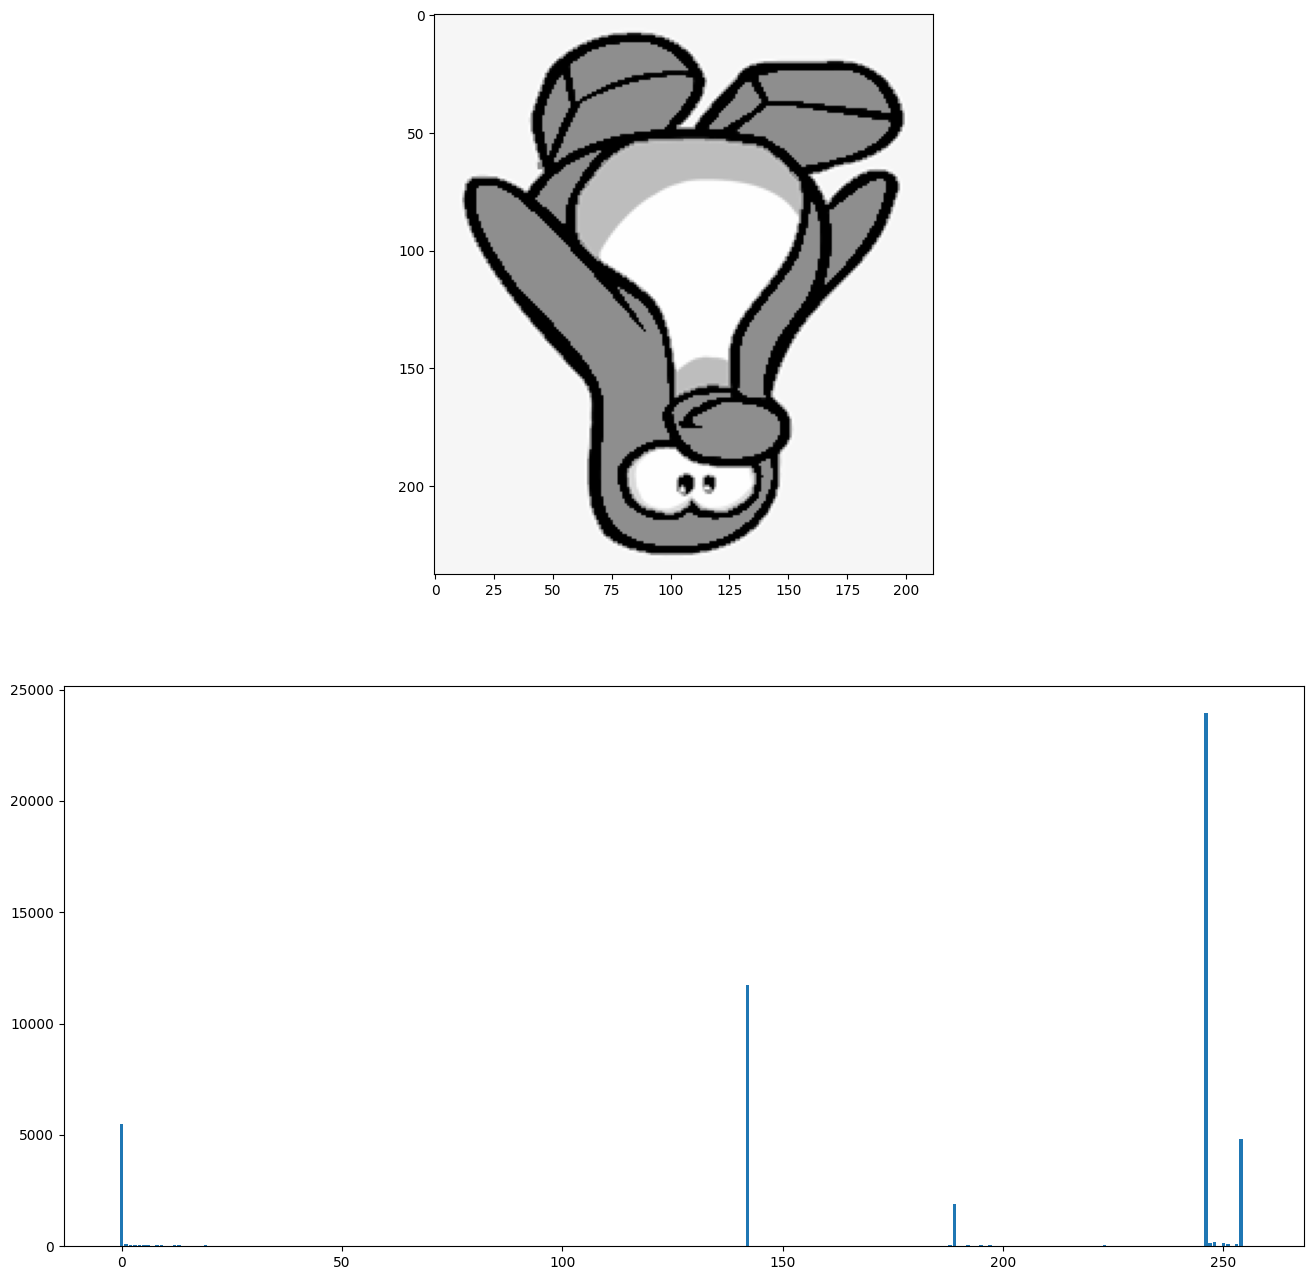

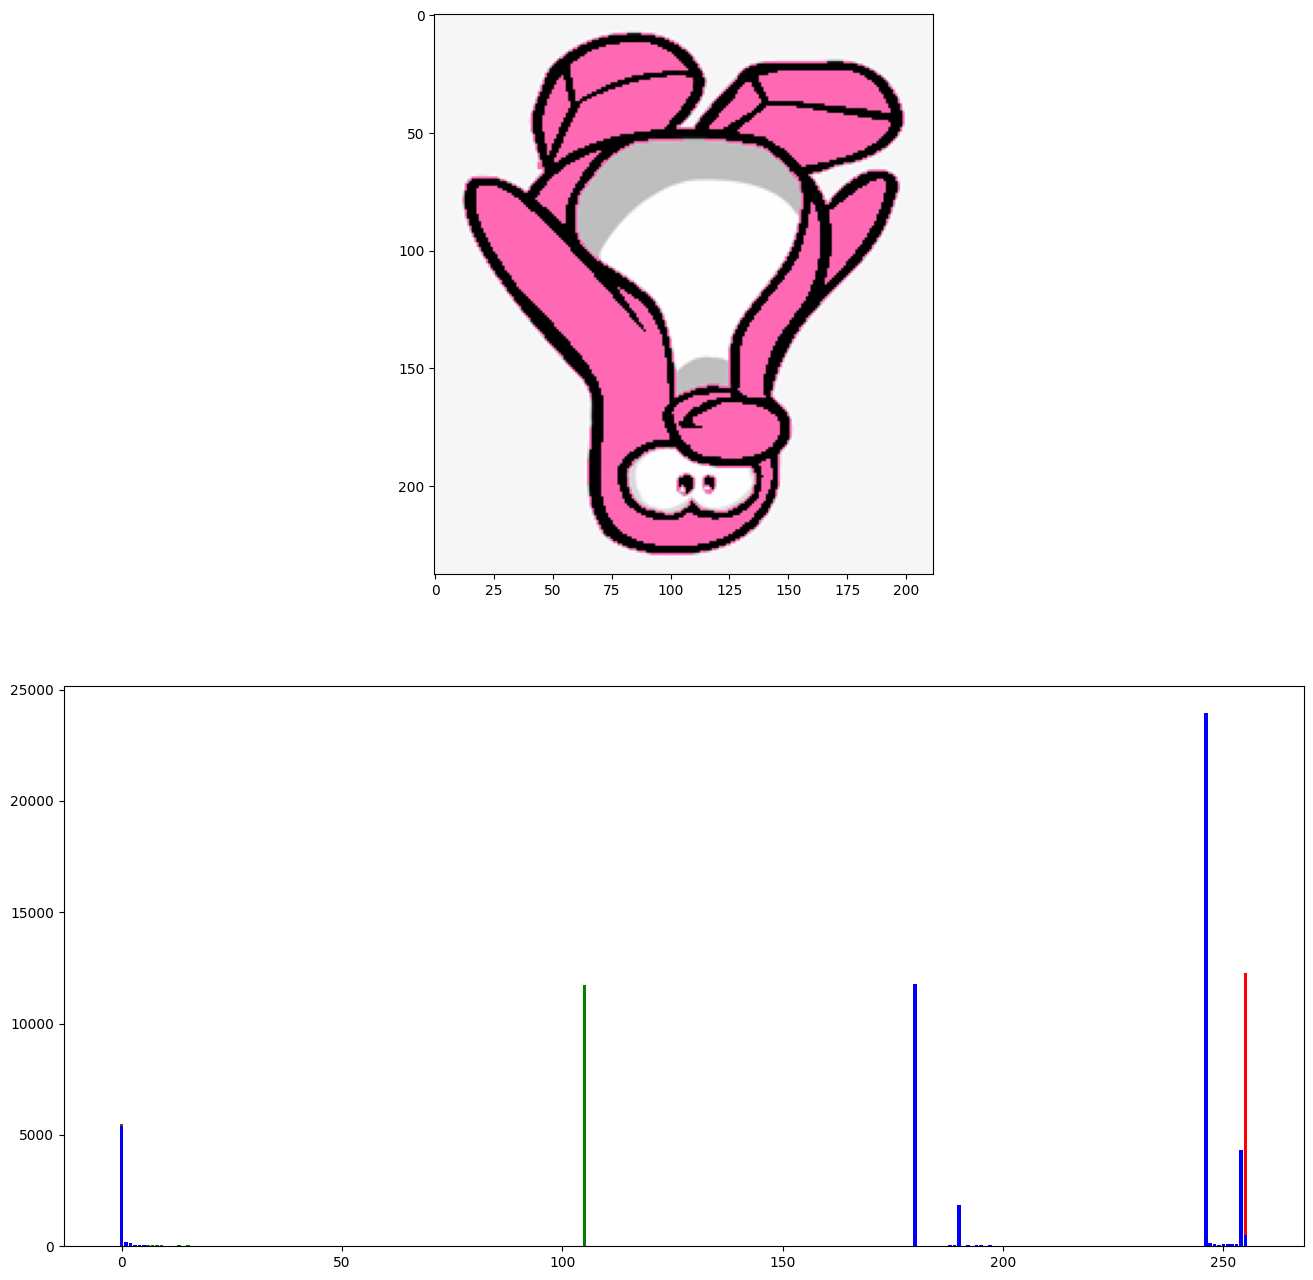

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Carregando a imagem
penguin = np.array(Image.open('pinguim_escolhido.png'))
(l, c, p) = penguin.shape
penguin_gray = ((0.2126 * penguin[:, :, 0]) + (0.7152 * penguin[:, :, 1]) + (0.0722 * penguin[:, :, 2])).astype(np.uint8)

# Funções vistas nas aulas
def histogram_gray(img):
    (l, c) = img.shape
    # Histograma com 1 linha e 256 colunas, preenchido com 0.
    histogram = np.zeros(256, dtype=np.int32)

    for i in range(l):
        for j in range(c):
            # Normalizar intensidade do pixel 
            intensity = img[i, j]
            # Incrementar de 1 a quantidade de pixels no histograma,
            # utilizando a intensidade como índice.
            histogram[intensity] += 1
            
    return histogram

def show_histogram_gray(img):
    histogram = histogram_gray(img)
    plt.figure(figsize=(16, 16))
    plt.subplot(2, 1, 1)
    # vmin e vmax não permitem que o matplotlib faça normalização das cores.
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.subplot(2, 1, 2)
    plt.bar(range(256), histogram)

def show_histogram(img):
    histogram_r = histogram_gray(img[:, :, 0])
    histogram_g = histogram_gray(img[:, :, 1])
    histogram_b = histogram_gray(img[:, :, 2])
    
    plt.figure(figsize=(16, 16))
    plt.subplot(2, 1, 1)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.subplot(2, 1, 2)
    plt.bar(range(256), histogram_r, color='red')
    plt.bar(range(256), histogram_g, color='green')
    plt.bar(range(256), histogram_b, color='blue')

# Chamando as funções aplicadas nas imagens
show_histogram_gray(penguin_gray)
show_histogram(penguin)


6- Aplique uma conversão para que todos os pixeis abaixo dele sejam pintados de sua cor favorita (por exemplo: Azul)
O threshold escolhido foi 143, é o valor ideal que separa todas as cores do pinguim (rosa e as linhas pretas) do fundo branco

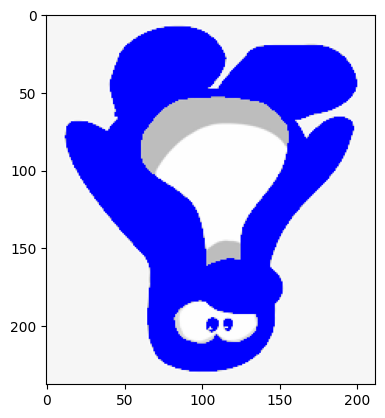

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Carregando a imagem
penguin = np.array(Image.open('pinguim_escolhido.png'))
(l, c, p) = penguin.shape
penguin_gray = ((0.2126 * penguin[:, :, 0]) + (0.7152 * penguin[:, :, 1]) + (0.0722 * penguin[:, :, 2])).astype(np.uint8)

def apply_color_threshold(penguin_gray, threshold, color=(0, 0, 255)):
    # Convertendo imagem de escala de cinza para RGB
    result_img = np.stack([penguin_gray]*3, axis=-1)
    
    # Aplicando a cor azul onde a intensidade for menor que o threshold
    below_threshold = penguin_gray < threshold
    
    result_img[below_threshold] = color
    
    return result_img

# Definindo o valor de threshold
threshold_value = 143

# Aplicando a conversão para a cor azul nos pixels abaixo do threshold
penguin_colored = apply_color_threshold(penguin_gray, threshold_value)

# Convertendo o array em uma imagem
penguin_colored = Image.fromarray(penguin_colored)

# Exibindo e salvando a imagem do pinguim com a cor aplicada
plt.imshow(penguin_colored)

penguin_colored.save('pinguim_colorido_threshold.png')